# 1.LIBRARIES AND DATA EXPLORING


* **pandas** for data formatting
* **sklearn** for ml models
* **numpy** for array operations
* **seaborn** for visualization
* **matplotlib** for visualization

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [8]:
data = pd.read_csv("insurance.csv")

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 1.1 DATA CLEANING

In [11]:
#detect missing values and duplicates
missing = data.isnull().sum()
print("Missing:\n", missing)


#duplicate rows and their indices
duplicate_rows = data[data.duplicated(keep=False)]
print("Duplicate Rows:\n", duplicate_rows)

Missing:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Duplicate Rows:
      age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [12]:
#removing duplicates
data2 = data.drop_duplicates()

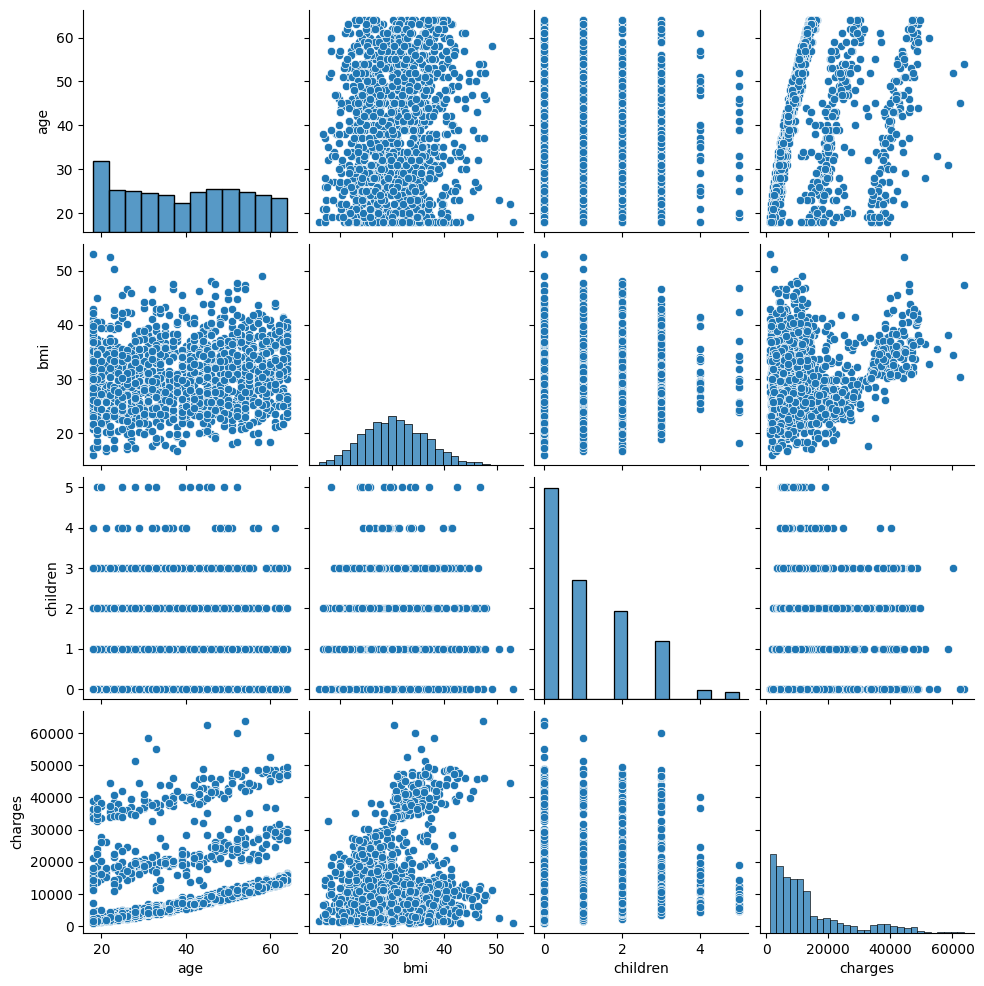

In [30]:
numerical_columns = ['age', 'bmi', 'children', 'charges']
sns.pairplot(data2[numerical_columns])
plt.show()

## 1.2 DATA OBSERVATION

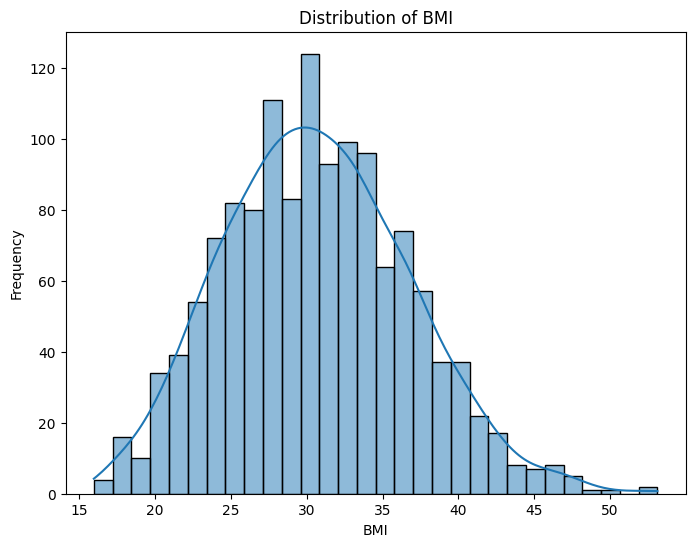

In [13]:
# 1. distribution of bmi
plt.figure(figsize=(8, 6))
sns.histplot(data2['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

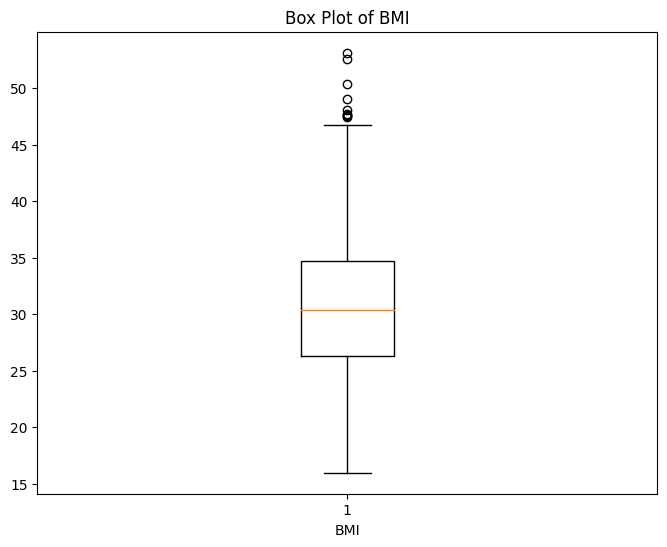

In [15]:
#detect the outliers within bmi
plt.figure(figsize=(8, 6))
plt.boxplot(data2["bmi"])

plt.title("Box Plot of BMI")
plt.xlabel("BMI")
plt.show()

#the points outside of the whiskers are the outliers

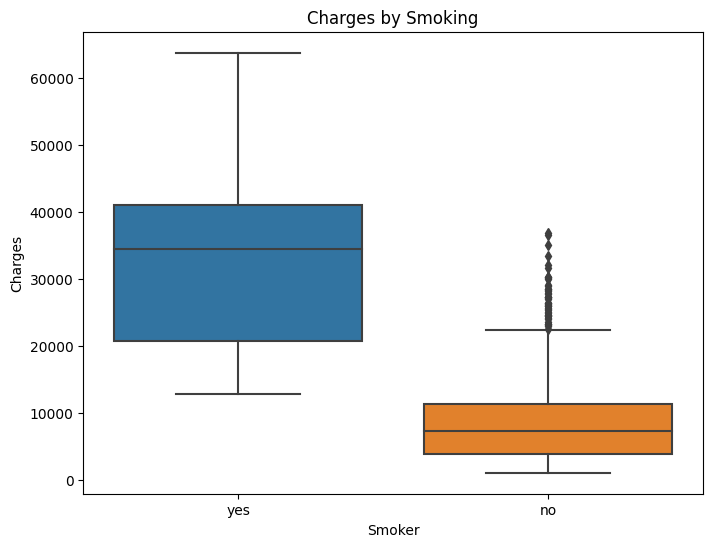

In [16]:
# 2. smoker and charges relationship
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=data2)
plt.title('Charges by Smoking')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

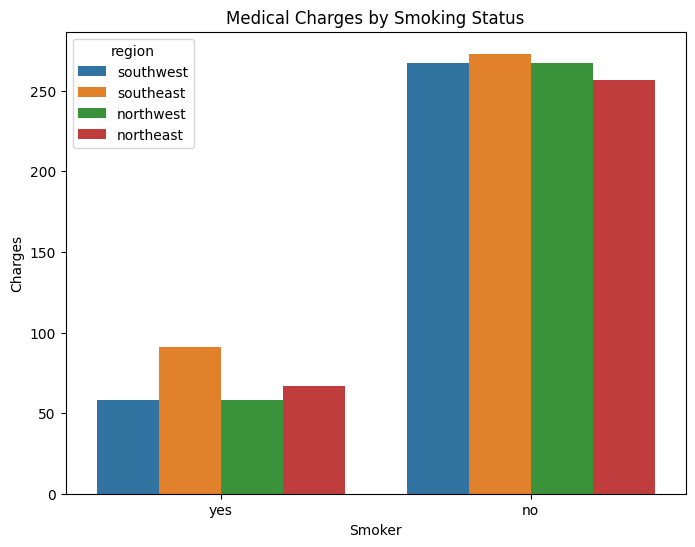

In [17]:
# 3. smoker and region
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', hue='region', data=data2)
plt.title('Medical Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

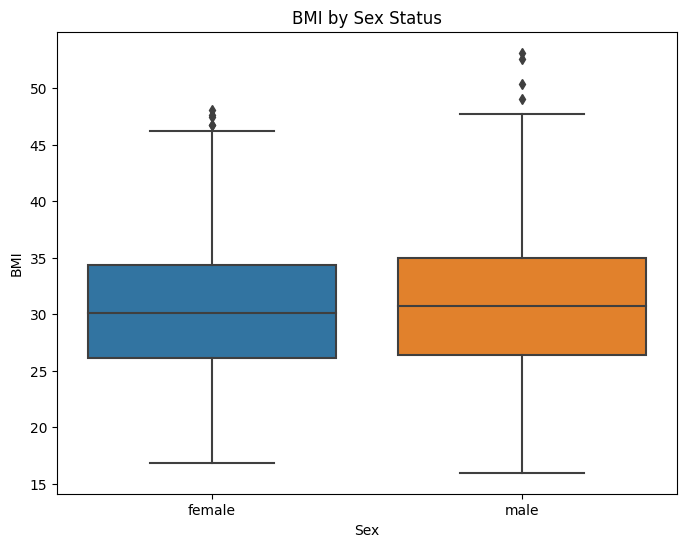

In [18]:
# 4. sex and bmi
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='bmi', data=data2)
plt.title('BMI by Sex Status')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

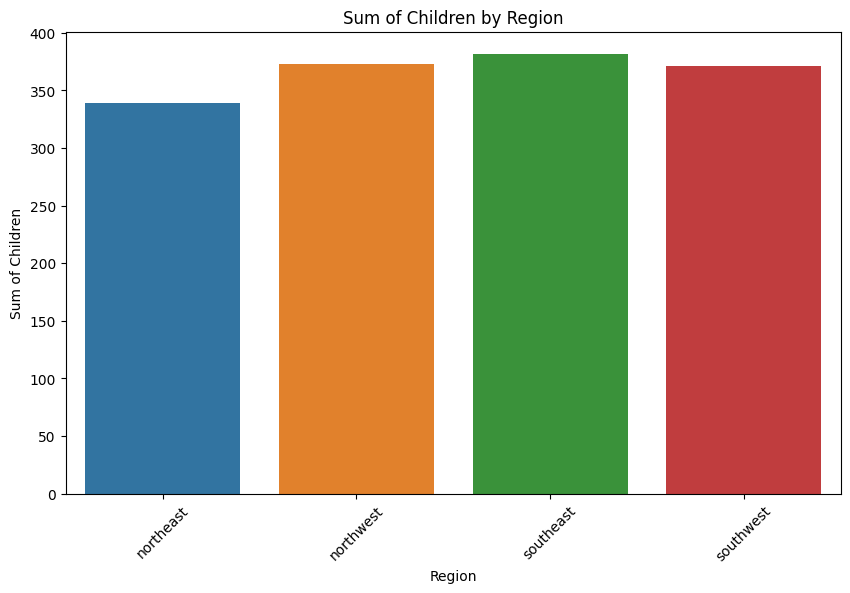

In [19]:
# 4. sum of children
#resetting index is necessary if the data has been formatted, to revert back the changes

region_children = data2.groupby('region')['children'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='children', data=region_children)
plt.title('Sum of Children by Region')
plt.xlabel('Region')
plt.ylabel('Sum of Children')
plt.xticks(rotation=45)
plt.show()

In [21]:
region_children = data2.groupby('region')['children'].sum()
most_children_region = region_children.idxmax()
total_children = region_children.max()
print(f"The region with the most children is {most_children_region} with a total of {total_children} children.")

The region with the most children is southeast with a total of 382 children.


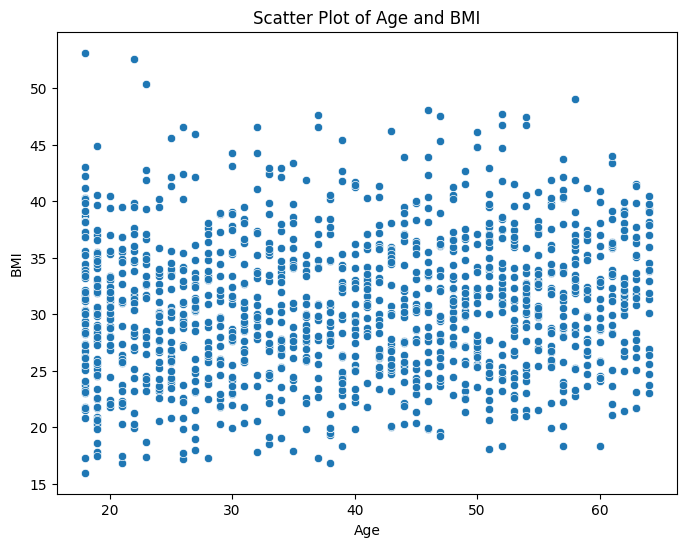

In [22]:
# 5. age and bmi
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='bmi', data=data2)
plt.title('Scatter Plot of Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

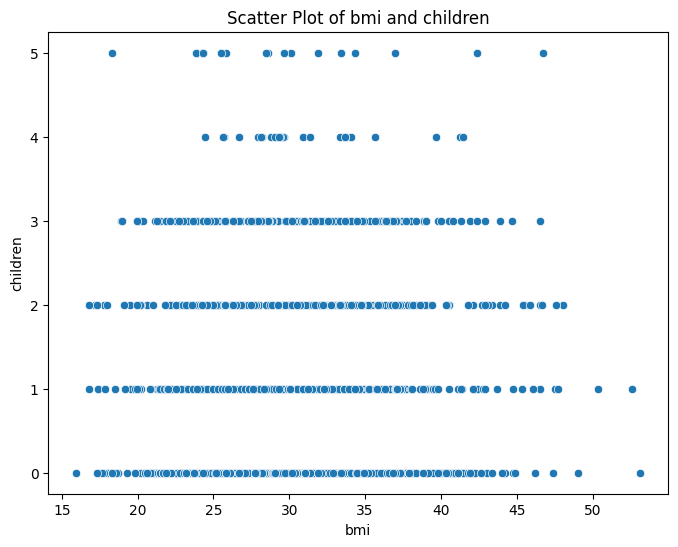

In [23]:
# 6. bmi and children
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='children', data=data2)
plt.title('Scatter Plot of bmi and children')
plt.xlabel('bmi')
plt.ylabel('children')
plt.show()

In [26]:
# 7. bmi outliers with z score and iqr methods

# z-scores
z_scores = stats.zscore(data2['bmi'])

# using z-score threshold (e.g., z_score_threshold = 2 for a common threshold)
z_score_threshold = 2
outliers = data2[abs(z_scores) > z_score_threshold]

print("Outliers using Z-Score:\n", outliers)

Outliers using Z-Score:
       age     sex     bmi  children smoker     region      charges
28     23    male  17.385         1     no  northwest   2775.19215
116    58    male  49.060         0     no  southeast  11381.32540
128    32  female  17.765         2    yes  northwest  32734.18630
172    18    male  15.960         0     no  northeast   1694.79640
198    51  female  18.050         0     no  northwest   9644.25250
232    19  female  17.800         0     no  southwest   1727.78500
250    18    male  17.290         2    yes  northeast  12829.45510
286    46  female  48.070         2     no  northeast   9432.92530
292    25    male  45.540         2    yes  southeast  42112.23560
356    46    male  43.890         3     no  southeast   8944.11510
380    27  female  17.955         2    yes  northeast  15006.57945
383    35  female  43.340         2     no  southeast   5846.91760
401    47    male  47.520         1     no  southeast   8083.91980
410    19    male  17.480         0  

In [27]:
# IQR
Q1 = data2['bmi'].quantile(0.25)
Q3 = data2['bmi'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# identify outliers
outliers = data2[(data2['bmi'] < lower_bound) | (data2['bmi'] > upper_bound)]

print("Outliers using IQR:\n", outliers)

Outliers using IQR:
       age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


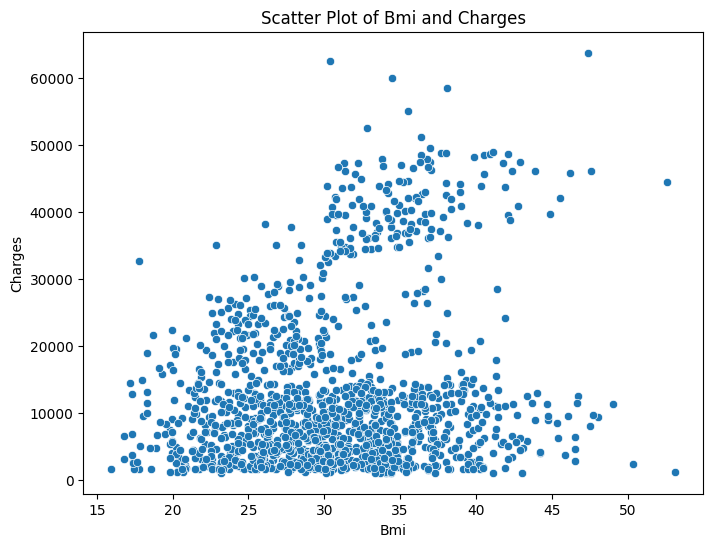

In [28]:
# 8. bmi and charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=data2)
plt.title('Scatter Plot of Bmi and Charges')
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.show()

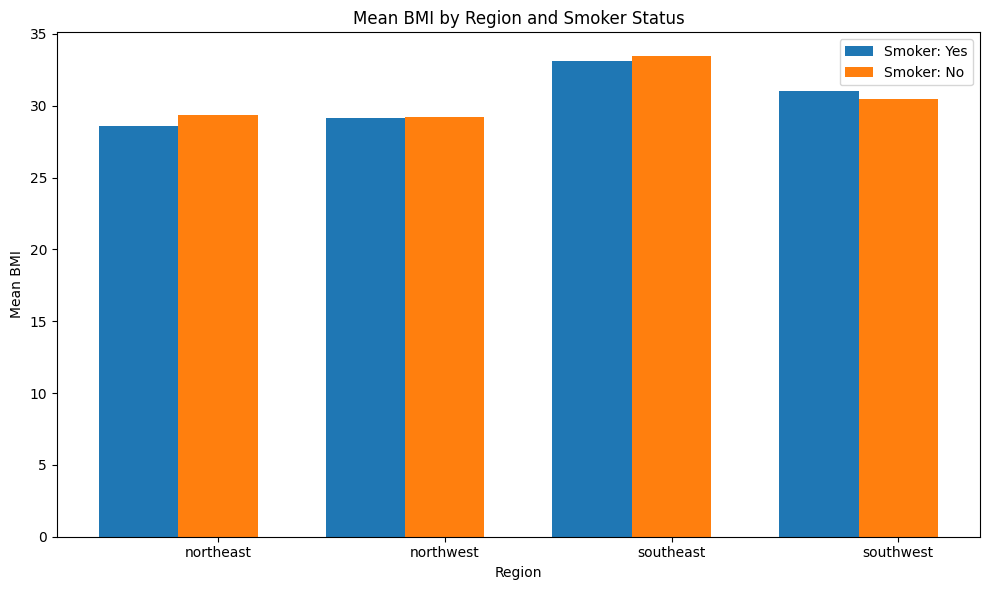

In [29]:
# 9. region, smoker and bmi
# grouping data by region and smoker, and calculating the mean BMI
grouped = data2.groupby(["region", "smoker"])["bmi"].mean().reset_index()

# grouped bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
regions = grouped["region"].unique()
x = range(len(regions))

for i, smoker_status in enumerate(["yes", "no"]):
    subset = grouped[grouped["smoker"] == smoker_status]
    plt.bar([pos + i * bar_width for pos in x], subset["bmi"], width=bar_width, label=f"Smoker: {smoker_status.capitalize()}")

plt.xlabel("Region")
plt.ylabel("Mean BMI")
plt.title("Mean BMI by Region and Smoker Status")
plt.xticks([pos + bar_width for pos in x], regions)
plt.legend()
plt.tight_layout()
plt.show()

# 2.PREPROCESSING

In [31]:
# encoding

# one-hot encoding for "region" and "children"
data2 = pd.get_dummies(data2, columns=["region", "children"], drop_first=True)
# reason: the algorithm may assume ordinal relationship if label encoding were to be used

# label encoding for "sex" and "smoker"
label_encoding_map = {"male": 0, "female": 1, "no": 0, "yes": 1}
data2["sex_encoded"] = data2["sex"].map(label_encoding_map)
data2["smoker_encoded"] = data2["smoker"].map(label_encoding_map)
data2 = data2.drop(["sex", "smoker"], axis=1)

In [32]:
data2.head()

,age,bmi,charges,region_northwest,region_southeast,region_southwest,children_1,children_2,children_3,children_4,children_5,sex_encoded,smoker_encoded
0,19,27.900,16884.92400,0,0,1,0,0,0,0,0,1,1
1,18,33.770,1725.55230,0,1,0,1,0,0,0,0,0,0
2,28,33.000,4449.46200,0,1,0,0,0,1,0,0,0,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,0,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,0,0,0


In [34]:
# feature matrix (X) and target vector (y)
X = data2.drop("charges", axis=1)  # Features
y = data2["charges"]  # Target

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3.MODEL SELECTION

Linear Regression Mean Squared Error: 36164386.94250912


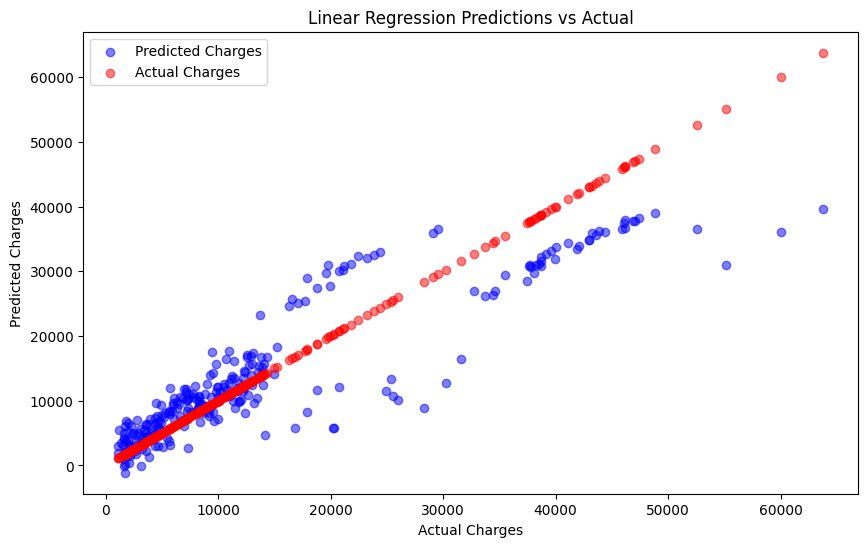

In [36]:
# create a linear regression model
linear_reg_model = LinearRegression()

# train the model
linear_reg_model.fit(X_train_scaled, y_train)

# make predictions
y_pred = linear_reg_model.predict(X_test_scaled)

# evaluate the model using mse
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)

# plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Charges', alpha=0.5)
plt.scatter(y_test, y_test, color='red', label='Actual Charges', alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression Predictions vs Actual')
plt.legend()
plt.show()

In [46]:
ridge_model = Ridge(alpha=0.2)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression MSE:", mse_ridge)

Ridge Regression MSE: 36170947.48498433


In [47]:
svr_model = SVR(kernel='linear', C=1.0)
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("SVR MSE:", mse_svr)

SVR Mean Squared Error: 190739373.4196252


In [49]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regression MSE:", mse_rf)


Random Forest Regression MSE: 21965976.063675135


In [51]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting Regression Mean Squared Error:", mse_gb)


Gradient Boosting Regression Mean Squared Error: 17659639.70359901


# 4.HYPERPARAMETER TUNING

In [53]:
# hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6]
}

# grid search with cross validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# best hyperparameters
best_params = grid_search.best_params_

# best model using the best hyperparameters
best_gb_model = GradientBoostingRegressor(**best_params, random_state=42)

# training
best_gb_model.fit(X_train_scaled, y_train)

# predictions
y_pred_best_gb = best_gb_model.predict(X_test_scaled)

# evaluation
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
print("Best Gradient Boosting Regression MSE:", mse_best_gb)



Best Gradient Boosting Regression Mean Squared Error: 19085158.44369932


In [55]:
rmse_best_gb = np.sqrt(mean_squared_error(y_test, y_pred_best_gb))
print("Best Gradient Boosting Regression RMSE:", rmse_best_gb)

Best Gradient Boosting Regression RMSE: 4368.656365943574


In [57]:
mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)
print("Best Gradient Boosting Regression MAE:", mae_best_gb)

Best Gradient Boosting Regression MAE: 2597.142985027514


In [60]:
r2_best_gb = r2_score(y_test, y_pred_best_gb)
print("Best Gradient Boosting Regression R2:", r2_best_gb)

Best Gradient Boosting Regression R2: 0.8961386197332204


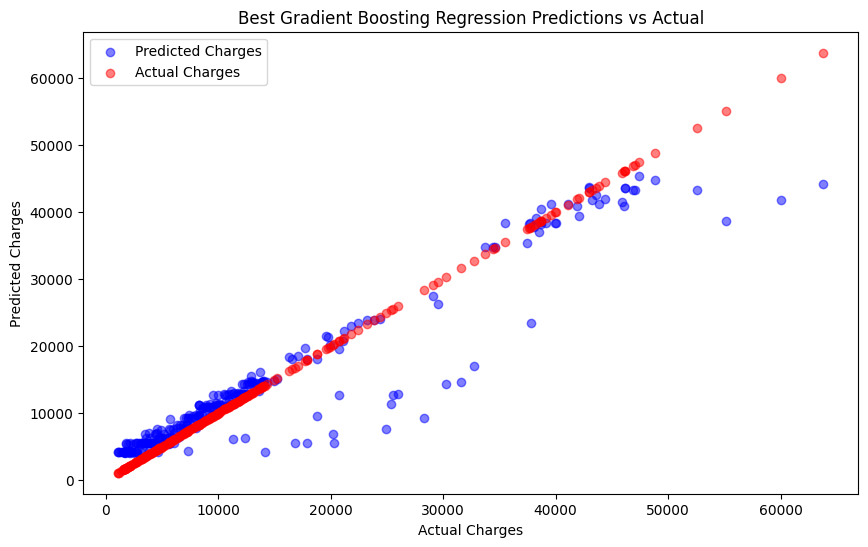

In [61]:
# Plotting best GB predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_gb, color='blue', label='Predicted Charges', alpha=0.5)
plt.scatter(y_test, y_test, color='red', label='Actual Charges', alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Best Gradient Boosting Regression Predictions vs Actual')
plt.legend()
plt.show()